In [10]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install mplcursors


Note: you may need to restart the kernel to use updated packages.


In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import mplcursors
from datetime import datetime


In [13]:
df_crypto_Dates = pd.read_csv("/Users/benjaminzelaya/Desktop/PI_DA-main/PI_2_Henry/DATA ETL/cripto_data_sorted.csv")
df_crypto_Dates

,id,symbol,name,current_price,market_cap,market_cap_rank,high_24h,low_24h,price_change_24h,price_change_percentage_24h,market_cap_change_24h,market_cap_change_percentage_24h,ath,ath_change_percentage,ath_date
0,bitcoin,btc,Bitcoin,"29,079.00","566,002,645,211.00",1,"29,408.00","29,053.00",-254.49,-86.76%,"-4,949,362,744.32",-86.69%,"69,045.00",-57.87%,2021-11-10T14:24:11.849Z
1,ethereum,eth,Ethereum,"1,821.40","218,868,994,489.00",2,"1,842.75","1,818.53",-16.86,-91.73%,"-2,053,000,983.60",-92.93%,"4,878.26",-62.65%,2021-11-10T14:24:19.604Z
2,tether,usdt,Tether,1.00,"83,135,475,584.00",3,1.00,1.00,0.00,26.67%,"-208,350,642.64",-25.00%,1.32,-24.40%,2018-07-24T00:00:00.000Z
3,binancecoin,bnb,BNB,233.03,"35,855,531,599.00",4,239.20,232.73,-5.55,-232.76%,"-875,347,235.56",-238.31%,686.31,-66.06%,2021-05-10T07:24:17.097Z
4,ripple,xrp,XRP,0.59,"31,317,407,561.00",5,0.63,0.59,-0.03,-495.79%,"-1,652,308,724.09",-501.16%,3.40,-82.57%,2018-01-07T00:00:00.000Z
5,usd-coin,usdc,USD Coin,1.00,"26,016,993,917.00",6,1.00,1.00,0.00,11.30%,"74,236,489.00",28.62%,1.17,-14.62%,2019-05-08T00:40:28.300Z
6,dogecoin,doge,Dogecoin,0.07,"9,725,167,619.00",8,0.07,0.07,-0.00,-614.68%,"-629,467,308.19",-607.91%,0.73,-90.57%,2021-05-08T05:08:23.458Z
7,cardano,ada,Cardano,0.27,"9,563,403,410.00",9,0.29,0.27,-0.02,-538.16%,"-548,125,916.29",-542.08%,3.09,-91.19%,2021-09-02T06:00:10.474Z
8,solana,sol,Solana,23.13,"9,391,870,633.00",10,24.92,22.99,-1.65,-666.59%,"-672,448,219.60",-668.15%,259.96,-91.13%,2021-11-06T21:54:35.825Z
9,polkadot,dot,Polkadot,4.73,"5,980,946,332.00",12,4.96,4.71,-0.22,-447.38%,"-279,562,748.71",-446.55%,54.98,-91.43%,2021-11-04T14:10:09.301Z


In [14]:
df_crypto_Dates['current_price']

0    29,079.00
1     1,821.40
2         1.00
3       233.03
4         0.59
5         1.00
6         0.07
7         0.27
8        23.13
9         4.73
Name: current_price, dtype: object

In [15]:
df_crypto_Dates['ath']

0    69,045.00
1     4,878.26
2         1.32
3       686.31
4         3.40
5         1.17
6         0.73
7         3.09
8       259.96
9        54.98
Name: ath, dtype: object

In [16]:
df_crypto_Dates.dtypes

id                                   object
symbol                               object
name                                 object
current_price                        object
market_cap                           object
market_cap_rank                       int64
high_24h                             object
low_24h                              object
price_change_24h                    float64
price_change_percentage_24h          object
market_cap_change_24h                object
market_cap_change_percentage_24h     object
ath                                  object
ath_change_percentage                object
ath_date                             object
dtype: object

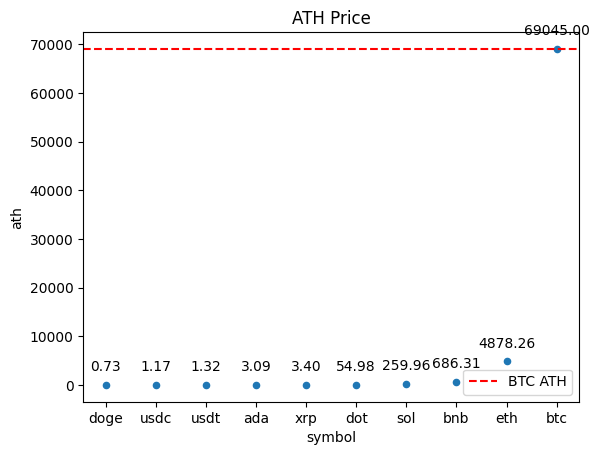

In [18]:


# Eliminar comas de la columna 'ath' y convertir a valores numéricos
df_crypto_Dates['ath'] = df_crypto_Dates['ath'].str.replace(',', '').astype(float)

# Ordenar el DataFrame por 'ath' de menor a mayor
df_sorted = df_crypto_Dates.sort_values(by='ath', ascending=True)

# Crear el gráfico de dispersión
fig, ax = plt.subplots()
df_sorted.plot(x='symbol', y='ath', kind='scatter', ax=ax)

# Configurar etiquetas y título
plt.xlabel('symbol')
plt.ylabel('ath')
plt.title('ATH Price')

# Agregar línea punteada roja para el ATH de BTC
btc_row = df_sorted[df_sorted['symbol'] == 'btc']
if not btc_row.empty:
    btc_position = btc_row['ath'].values[0]
    ax.axhline(y=btc_position, color='red', linestyle='--', label='BTC ATH')

# Mostrar los valores exactos en los puntos del gráfico
for i, row in df_sorted.iterrows():
    ax.annotate(f"{row['ath']:.2f}", (row['symbol'], row['ath']), textcoords="offset points", xytext=(0,10), ha='center')

# Mostrar leyenda
ax.legend()

plt.show()





## Este gráfico de  valores "ATH" (All-Time High) de diferentes criptomonedas en el eje y y sus símbolos en el eje x. Aquí hay algunas conclusiones que se pueden extraer del gráfico:

* Este gráfico nos permite comparar los valores ATH de diferentes criptomonedas. Puedes observar cómo se sitúan los valores ATH de las distintas criptomonedas en relación entre sí.

* La línea horizontal punteada roja indica el valor ATH de Bitcoin (BTC), que sirve como punto de referencia para comparar con los valores ATH de otras criptomonedas. Esto permite visualizar fácilmente cuán cerca o lejos están otros activos de alcanzar el ATH de Bitcoin.

* Nos muestra la variabilidad en los valores ATH de diferentes criptomonedas. Algunas criptomonedas pueden tener valores ATH significativamente más altos o más bajos que otras.

* Al observar las anotaciones en el gráfico, es posible notar patrones o tendencias en el comportamiento de los valores ATH a lo largo de diferentes criptomonedas.

* La distribución de los puntos en el gráfico puede proporcionar información sobre la distribución de los valores ATH en el mercado de criptomonedas en ese momento.

* La línea punteada roja también enfatiza la importancia y el reconocimiento del ATH de Bitcoin en el mercado de criptomonedas elegidas.

### Esto nos permite una rápida visualización y comparación de los valores ATH de varias criptomonedas, destacando la posición de Bitcoin como punto de referencia en el mercado. Puede ayudar a los clientes inversores y analistas a identificar tendencias, patrones y diferencias en los valores ATH de diferentes activos digitales

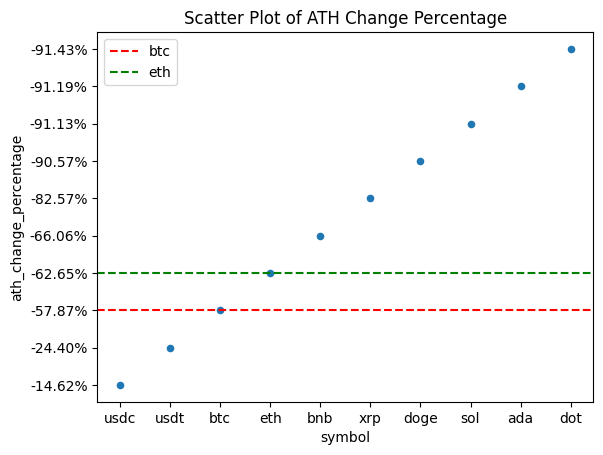

In [10]:
# Ordenar el DataFrame por 'ath_change_percentage' de menor a mayor
df_sorted_ath = df_crypto_Dates.sort_values('ath_change_percentage', ascending=True)

# Crear el gráfico de dispersión
fig, ax = plt.subplots()
df_sorted_ath.plot(x='symbol', y='ath_change_percentage', kind='scatter', ax=ax)

# Agregar línea para indicar "btc"
btc_row = df_sorted_ath[df_sorted_ath['symbol'] == 'btc']
if not btc_row.empty:
    btc_position = btc_row['ath_change_percentage'].values[0]
    ax.axhline(y=btc_position, color='red', linestyle='--', label='btc')

# Agregar línea para indicar "eth"
eth_row = df_sorted_ath[df_sorted_ath['symbol'] == 'eth']
if not eth_row.empty:
    eth_position = eth_row['ath_change_percentage'].values[0]
    ax.axhline(y=eth_position, color='green', linestyle='--', label='eth')

# Configurar etiquetas y título
plt.xlabel('symbol')
plt.ylabel('ath_change_percentage')
plt.title('Scatter Plot of ATH Change Percentage')


# Mostrar leyenda
plt.legend()

plt.show()

### En este grafico analizamos el porcentaje de cambio que tuvieron los current_price del dataframe que estamos analizando cuya fecha es 17/8/23, donde analizando los token que no entran dentro de la categoria de stablecoins, btc y eth son los token que menos se alejaron de su ATH , en relacion al resto de los token donde algunos estan llegando casi al 100%

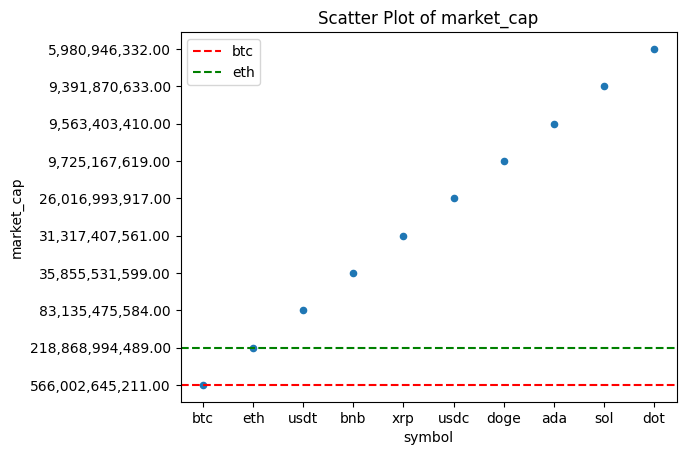

In [22]:


# Crear el gráfico de dispersión
fig, ax = plt.subplots()
df_crypto_Dates.plot(x='symbol', y='market_cap', kind='scatter', ax=ax)

# Encontrar los índices de 'btc' y 'eth' en el DataFrame ordenado
btc_index = df_crypto_Dates[df_crypto_Dates['symbol'] == 'btc'].index[0]
eth_index = df_crypto_Dates[df_crypto_Dates['symbol'] == 'eth'].index[0]

# Agregar línea para indicar "btc"
ax.axhline(y=df_crypto_Dates.loc[btc_index, 'market_cap'], color='red', linestyle='--', label='btc')

# Agregar línea para indicar "eth"
ax.axhline(y=df_crypto_Dates.loc[eth_index, 'market_cap'], color='green', linestyle='--', label='eth')

# Configurar etiquetas y título
plt.xlabel('symbol')
plt.ylabel('market_cap')
plt.title('Scatter Plot of market_cap')

# Mostrar leyenda
plt.legend()

plt.show()




## Este gráfico de dispersión permite comparar la capitalización de mercado de las criptomonedas seleccionadas en función de su símbolo. Cada punto en el gráfico representa una criptomoneda diferente y su capitalización de mercado en el eje vertical:

* Las líneas punteadas rojas y verdes que indican "btc" y "eth" representan las respectivas capitalizaciones de mercado de Bitcoin y Ethereum en el momento en que se generó el gráfico. Esto facilita la comparación de la capitalización de mercado de otras criptomonedas con dos de las criptomonedas más conocidas y establecidas.

* La dispersión de puntos en el gráfico muestra la variación en la capitalización de mercado entre diferentes criptomonedas. Puedes observar cuáles criptomonedas tienen una capitalización de mercado similar y cuáles presentan diferencias notables.

* En relacion a la capitacion de mercado de la fecha tomada en cuenta que seria el mes de agosto de 2023, es posible identificar que tanto BTC como ETH tienen la mayor cantidad de su capitalización de mercado, lo que puede indicarnos el nivel de confianza de ambos token en el ecosistema de las criptomonedas.

In [23]:
df_crypto_Dates['market_cap']

0    566,002,645,211.00
1    218,868,994,489.00
2     83,135,475,584.00
3     35,855,531,599.00
4     31,317,407,561.00
5     26,016,993,917.00
6      9,725,167,619.00
7      9,563,403,410.00
8      9,391,870,633.00
9      5,980,946,332.00
Name: market_cap, dtype: object

# EDA POR  TOKEN

* BITCOIN

In [46]:
# Extraemos el csv que contiene solo BTC desde el 1 de enero de 2020 hasta el 18/8/2023

df_btc = pd.read_csv("/Users/benjaminzelaya/Desktop/PI_DA-main/PI_2_Henry/DATA ETL/combined_df_btc.csv")
df_btc


,date,price,market_cap,ath_value,ath_date,symbol,name
0,2020-01-01,7195.153895,1.303941e+11,67617.015545,2021-11-09,btc,Bitcoin
1,2020-01-02,7193.754668,1.304230e+11,67617.015545,2021-11-09,btc,Bitcoin
2,2020-01-03,6963.853354,1.262808e+11,67617.015545,2021-11-09,btc,Bitcoin
3,2020-01-04,7300.346935,1.327663e+11,67617.015545,2021-11-09,btc,Bitcoin
4,2020-01-05,7351.377053,1.334747e+11,67617.015545,2021-11-09,btc,Bitcoin
...,...,...,...,...,...,...,...
1321,2023-08-14,29284.969714,5.696871e+11,67617.015545,2021-11-09,btc,Bitcoin
1322,2023-08-15,29400.586804,5.722427e+11,67617.015545,2021-11-09,btc,Bitcoin
1323,2023-08-16,29170.490397,5.674983e+11,67617.015545,2021-11-09,btc,Bitcoin
1324,2023-08-17,28754.197021,5.599826e+11,67617.015545,2021-11-09,btc,Bitcoin


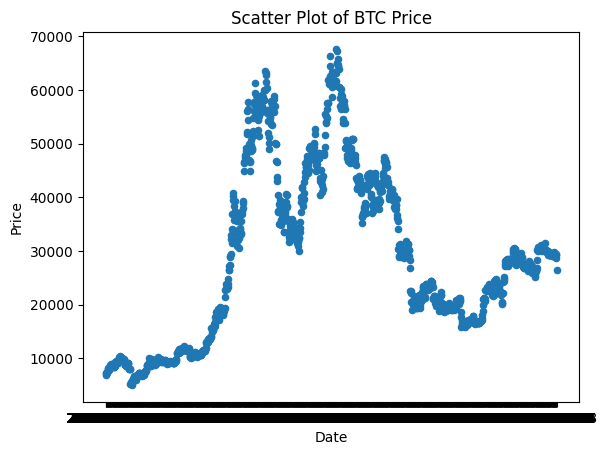

In [47]:
df_btc.plot(x='date', y='price', kind='scatter')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Scatter Plot of BTC Price')
plt.show()

## El gráfico de dispersión que muestra la relación entre las fechas (eje x) y los precios de Bitcoin (BTC) (eje y). Cada punto en el gráfico representa una fecha específica y su precio correspondiente de Bitcoin en ese momento. Aquí hay algunas conclusiones que se pueden extraer del gráfico:

* En general, se puede observar una tendencia alcista en el precio de Bitcoin a lo largo del período representado. A medida que avanzan las fechas, los precios tienden a aumentar gradualmente.

*  A pesar de la tendencia alcista, hay una cantidad significativa de dispersión en los puntos, lo que indica que el precio de Bitcoin ha experimentado fluctuaciones considerables en el período. Esto refleja la volatilidad inherente en los mercados de criptomonedas.

* A lo largo del gráfico, se pueden identificar puntos en los que el precio de Bitcoin alcanza valores máximos locales (picos) y valores mínimos locales (valles). Estos puntos representan momentos de mayor interés para los inversores y pueden estar asociados con eventos específicos en el mercado.

* Se puede observar que en ciertos momentos de crecimiento rápido, la dispersión de los puntos aumenta, lo que indica una mayor volatilidad durante esos períodos.

* Tendencias a Corto Plazo, con patrones de comportamiento repetitivos o ciclos de mercado que se repiten en intervalos digamos que regulares.


### Este gráfico de dispersión proporciona una instantánea visual de la evolución del precio de Bitcoin a lo largo del tiempo desde el 2020 hasta agosto de 2023, mostrando tanto la tendencia general alcista como la volatilidad característica del mercado de criptomonedas, y puede ayudar a los inversores a identificar patrones y tendencias a medida que analizan el rendimiento histórico de Bitcoin.

In [28]:
df_btc.columns

Index(['date', 'price', 'market_cap', 'ath_value', 'ath_date', 'symbol',
       'name'],
      dtype='object')

#  observaciones de todos los meses del año 2020

In [31]:
df_btc['date'] = pd.to_datetime(df_btc['date'])

# datos del año 2020
df_btc_2020 = df_btc[df_btc['date'].dt.year == 2020]
df_btc_2020

,date,price,market_cap,ath_value,ath_date,symbol,name
0,2020-01-01,7195.153895,1.303941e+11,67617.015545,2021-11-09,btc,Bitcoin
1,2020-01-02,7193.754668,1.304230e+11,67617.015545,2021-11-09,btc,Bitcoin
2,2020-01-03,6963.853354,1.262808e+11,67617.015545,2021-11-09,btc,Bitcoin
3,2020-01-04,7300.346935,1.327663e+11,67617.015545,2021-11-09,btc,Bitcoin
4,2020-01-05,7351.377053,1.334747e+11,67617.015545,2021-11-09,btc,Bitcoin
...,...,...,...,...,...,...,...
361,2020-12-27,26476.130137,4.919786e+11,67617.015545,2021-11-09,btc,Bitcoin
362,2020-12-28,26423.228792,4.934275e+11,67617.015545,2021-11-09,btc,Bitcoin
363,2020-12-29,27125.384121,5.037122e+11,67617.015545,2021-11-09,btc,Bitcoin
364,2020-12-30,27424.538955,5.096803e+11,67617.015545,2021-11-09,btc,Bitcoin


In [89]:
# Guardar el DataFrame combinado en un archivo CSV
df_btc_2020.to_csv('df_btc_2020.csv', index=False)


#  observaciones de todos los meses del año 2021

In [32]:
df_btc['date'] = pd.to_datetime(df_btc['date'])

# datos del año 2021
df_btc_2021 = df_btc[df_btc['date'].dt.year == 2021]
df_btc_2021

,date,price,market_cap,ath_value,ath_date,symbol,name
366,2021-01-01,29022.418395,5.394380e+11,67617.015545,2021-11-09,btc,Bitcoin
367,2021-01-02,29352.126792,5.455933e+11,67617.015545,2021-11-09,btc,Bitcoin
368,2021-01-03,32163.824935,5.978877e+11,67617.015545,2021-11-09,btc,Bitcoin
369,2021-01-04,33008.226203,6.136169e+11,67617.015545,2021-11-09,btc,Bitcoin
370,2021-01-05,31515.575967,5.857263e+11,67617.015545,2021-11-09,btc,Bitcoin
...,...,...,...,...,...,...,...
726,2021-12-27,50852.860260,9.617239e+11,67617.015545,2021-11-09,btc,Bitcoin
727,2021-12-28,50774.067815,9.602807e+11,67617.015545,2021-11-09,btc,Bitcoin
728,2021-12-29,47725.148046,9.026558e+11,67617.015545,2021-11-09,btc,Bitcoin
729,2021-12-30,46506.994648,8.743141e+11,67617.015545,2021-11-09,btc,Bitcoin


In [90]:
# Guardar el DataFrame combinado en un archivo CSV
df_btc_2021.to_csv('df_btc_2021.csv', index=False)

In [53]:
max_price = df_btc_2021['price'].max()

# Mostrar el valor máximo de 'price' en la salida
print("Monto máximo de la columna 'price':", max_price)

Monto máximo de la columna 'price': 67617.0155448617


#  observaciones de todos los meses del año 2022

In [33]:

# datos del año 2022
df_btc_2022 = df_btc[df_btc['date'].dt.year == 2022]
df_btc_2022

,date,price,market_cap,ath_value,ath_date,symbol,name
731,2022-01-01,46319.651088,8.761929e+11,67617.015545,2021-11-09,btc,Bitcoin
732,2022-01-02,47816.077676,9.045519e+11,67617.015545,2021-11-09,btc,Bitcoin
733,2022-01-03,47387.212168,8.975361e+11,67617.015545,2021-11-09,btc,Bitcoin
734,2022-01-04,46531.140861,8.803302e+11,67617.015545,2021-11-09,btc,Bitcoin
735,2022-01-05,45938.024272,8.762427e+11,67617.015545,2021-11-09,btc,Bitcoin
...,...,...,...,...,...,...,...
1091,2022-12-27,16900.081872,3.250369e+11,67617.015545,2021-11-09,btc,Bitcoin
1092,2022-12-28,16701.840211,3.213515e+11,67617.015545,2021-11-09,btc,Bitcoin
1093,2022-12-29,16538.906094,3.182889e+11,67617.015545,2021-11-09,btc,Bitcoin
1094,2022-12-30,16644.379087,3.202973e+11,67617.015545,2021-11-09,btc,Bitcoin


In [91]:
# Guardar el DataFrame combinado en un archivo CSV
df_btc_2022.to_csv('df_btc_2022.csv', index=False)

#  observaciones de todos los meses del año 2023

In [34]:

# datos del año 2023
df_btc_2023 = df_btc[df_btc['date'].dt.year == 2023]
df_btc_2023

,date,price,market_cap,ath_value,ath_date,symbol,name
1096,2023-01-01,16540.693625,3.182783e+11,67617.015545,2021-11-09,btc,Bitcoin
1097,2023-01-02,16615.969318,3.198320e+11,67617.015545,2021-11-09,btc,Bitcoin
1098,2023-01-03,16674.342536,3.214865e+11,67617.015545,2021-11-09,btc,Bitcoin
1099,2023-01-04,16677.646186,3.210808e+11,67617.015545,2021-11-09,btc,Bitcoin
1100,2023-01-05,16855.174739,3.243976e+11,67617.015545,2021-11-09,btc,Bitcoin
...,...,...,...,...,...,...,...
1321,2023-08-14,29284.969714,5.696871e+11,67617.015545,2021-11-09,btc,Bitcoin
1322,2023-08-15,29400.586804,5.722427e+11,67617.015545,2021-11-09,btc,Bitcoin
1323,2023-08-16,29170.490397,5.674983e+11,67617.015545,2021-11-09,btc,Bitcoin
1324,2023-08-17,28754.197021,5.599826e+11,67617.015545,2021-11-09,btc,Bitcoin


In [92]:
# Guardar el DataFrame combinado en un archivo CSV
df_btc_2023.to_csv('df_btc_2023.csv', index=False)

# ANALISIS DE EVOLUCION DE PRECIOS DE CADA UNO DE LOS PERIODOS ANALIZADOS

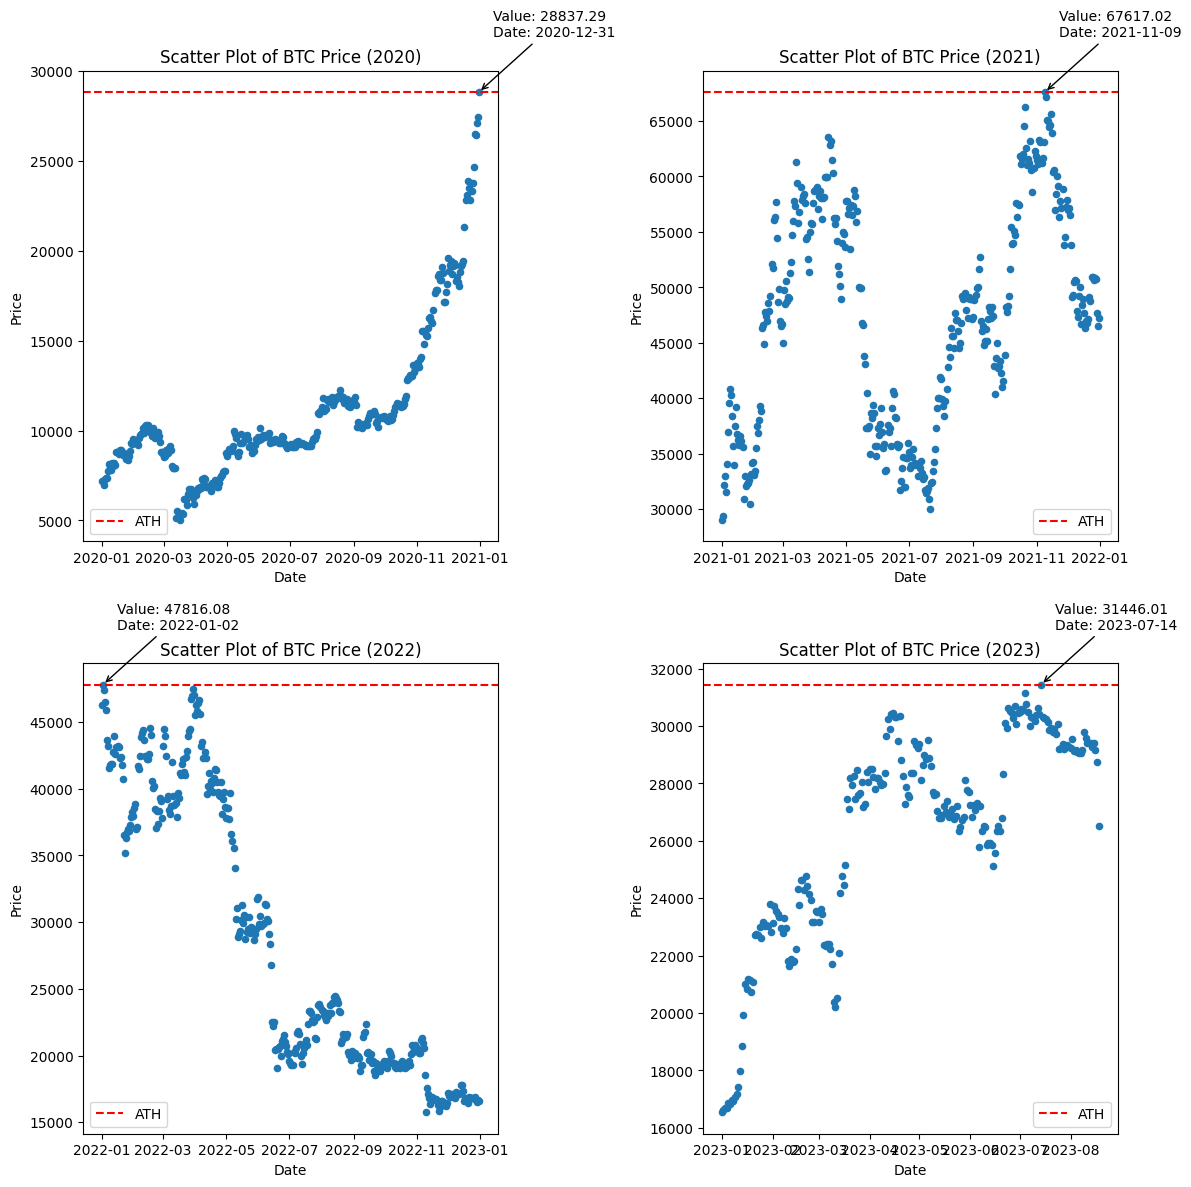

In [35]:
# Crear una lista de DataFrames y años correspondientes
dfs = [df_btc_2020, df_btc_2021, df_btc_2022, df_btc_2023]
years = [2020, 2021, 2022, 2023]

# Configurar el diseño de los subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Iterar a través de los DataFrames y años para generar los subgráficos
for i, df in enumerate(dfs):
    row = i // 2
    col = i % 2
    
    ax = df.plot(x='date', y='price', kind='scatter', ax=axes[row, col])
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.set_title(f'Scatter Plot of BTC Price ({years[i]})')
    
    # Obtener el ATH del año actual
    ath_value = df['price'].max()
    
    # Obtener la fecha correspondiente al ATH
    ath_date = df.loc[df['price'].idxmax()]['date']
    
    # Agregar la línea indicadora del ATH
    ax.axhline(y=ath_value, color='red', linestyle='--', label='ATH')
    
    # Formatear la fecha del ATH para mostrar solo el año, mes y día (sin hora)
    formatted_ath_date = ath_date.strftime('%Y-%m-%d')
    
    # Agregar anotación para mostrar el valor y la fecha del ATH en cada punto
    ax.annotate(f'Value: {ath_value:.2f}\nDate: {formatted_ath_date}', xy=(ath_date, ath_value),
                xytext=(10, 40), textcoords='offset points', arrowprops=dict(arrowstyle='->'))

    # Mostrar leyenda
    ax.legend()

# Ajustar el diseño de los subplots y mostrar el gráfico
plt.tight_layout()
plt.show()



## Aqui comparamos los precios de Bitcoin (BTC) en forma de gráficos de dispersión en diferentes años (2020, 2021, 2022 y 2023):

* En todos los años representados, se observa un crecimiento gradual en el valor del precio de Bitcoin. Aunque puede haber fluctuaciones y movimientos de precio a corto plazo, en general se puede notar una tendencia al alza a lo largo del tiempo.

* Los puntos de ATH (All-Time High, máximo histórico) están marcados en cada gráfico con líneas discontinuas rojas. Estos puntos representan los momentos en que el precio de Bitcoin alcanzó su valor más alto en cada año respectivo. Se puede observar que estos puntos son momentos clave de interés para los inversores y a menudo están seguidos por períodos de corrección o consolidación en el mercado.

*  A pesar de la tendencia alcista general, se pueden identificar áreas con mayor concentración de puntos dispersos, lo que indica fluctuaciones temporales en el precio de Bitcoin. Estos períodos de mayor volatilidad pueden estar relacionados con eventos específicos, como anuncios importantes, desarrollos regulatorios o condiciones macroeconómicas.

* Al visualizar los gráficos uno al lado del otro, es posible comparar directamente la distribución y tendencia de los precios de Bitcoin en diferentes años. Esto puede ayudar a identificar patrones recurrentes, así como diferencias en la volatilidad y el rendimiento a lo largo del tiempo.

* Cada punto de ATH está acompañado por una anotación que muestra el valor y la fecha del máximo histórico. Estas marcas proporcionan información adicional sobre los momentos clave en la historia de precios de Bitcoin.



# ANALISIS DE MARKET CAP

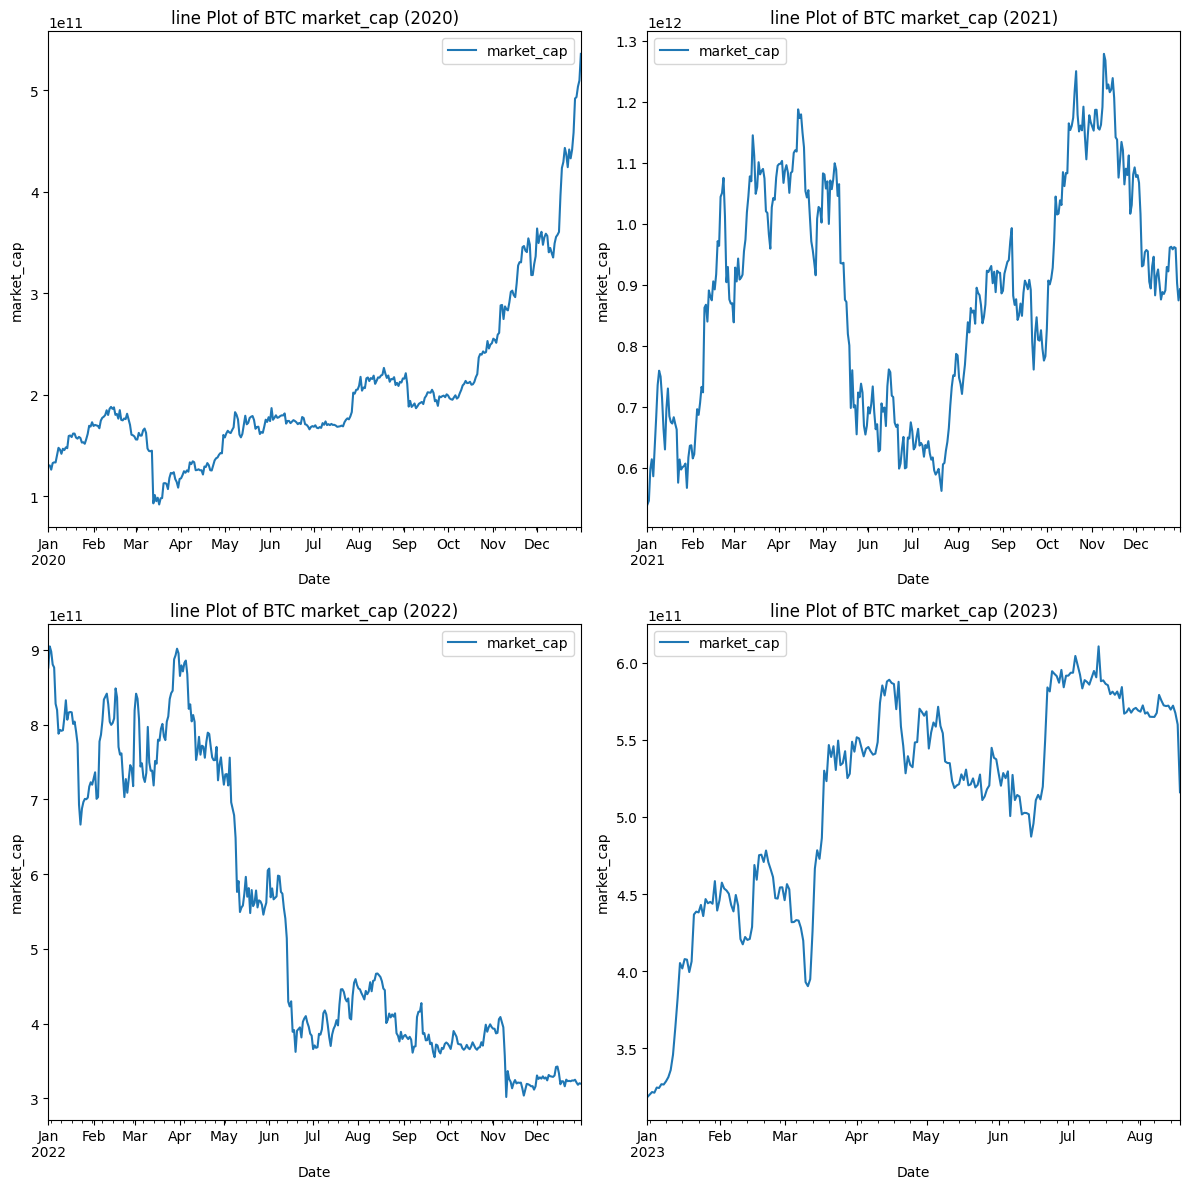

In [36]:

fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Graficar cada DataFrame en su respectivo subplot
df_btc_2020.plot(x='date', y='market_cap', kind='line', ax=axes[0, 0])
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('market_cap')
axes[0, 0].set_title('line Plot of BTC market_cap (2020)')

df_btc_2021.plot(x='date', y='market_cap', kind='line', ax=axes[0, 1])
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('market_cap')
axes[0, 1].set_title('line Plot of BTC market_cap (2021)')

df_btc_2022.plot(x='date', y='market_cap', kind='line', ax=axes[1, 0])
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('market_cap')
axes[1, 0].set_title('line Plot of BTC market_cap (2022)')

df_btc_2023.plot(x='date', y='market_cap', kind='line', ax=axes[1, 1])
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('market_cap')
axes[1, 1].set_title('line Plot of BTC market_cap (2023)')

# Ajustar el diseño de los subplots y mostrar el gráfico
plt.tight_layout()
plt.show()

## En este grafico que compara las líneas de tiempo de la capitalización de mercado de Bitcoin (BTC) en diferentes años (2020, 2021, 2022 y 2023), se pueden extraer varios datos:

* En todos los años representados, se observa un patrón general de crecimiento sostenido en la capitalización de mercado de Bitcoin. A medida que avanzan los años, se aprecia cómo el mercado de BTC ha experimentado un aumento constante en su valor total.

* Aunque el crecimiento es constante, también se pueden identificar períodos de mayor volatilidad y fluctuaciones en la capitalización de mercado. Estos períodos pueden estar relacionados con eventos significativos en el mercado de criptomonedas, como cambios regulatorios, anuncios importantes o movimientos bruscos en los mercados financieros globales.

*  Al observar los gráficos individualmente, es posible identificar picos y valles que pueden correlacionarse con eventos específicos ocurridos durante esos años. Por ejemplo, un pico pronunciado podría estar asociado con un aumento en la adopción, un interés renovado de los inversores o un importante anuncio relacionado con Bitcoin.

* Dependiendo de la línea de tiempo, también es posible identificar patrones estacionales en la capitalización de mercado de BTC. Estos patrones pueden estar relacionados con patrones históricos de inversión en criptomonedas, como aumentos en la adopción durante ciertos meses del año.

* Al visualizar los gráficos uno al lado del otro, es posible comparar directamente el crecimiento y las tendencias de la capitalización de mercado de Bitcoin en diferentes años. Esto puede ayudar a identificar similitudes y diferencias en el comportamiento del mercado a lo largo del tiempo.

### En resumen, el gráfico de líneas proporciona una visión clara de cómo ha evolucionado la capitalización de mercado de Bitcoin en diferentes años. 

# ETH

In [38]:
df_eth = pd.read_csv("/Users/benjaminzelaya/Desktop/PI_DA-main/PI_2_Henry/DATA ETL/combined_df_ethereum.csv")
df_eth

,date,price,market_cap,ath_value,ath_date,symbol,name
0,2020-01-01,129.186385,1.409745e+10,4815.004634,2021-11-09,eth,Ethereum
1,2020-01-02,130.484685,1.423059e+10,4815.004634,2021-11-09,eth,Ethereum
2,2020-01-03,127.045258,1.385979e+10,4815.004634,2021-11-09,eth,Ethereum
3,2020-01-04,133.702649,1.461319e+10,4815.004634,2021-11-09,eth,Ethereum
4,2020-01-05,134.136883,1.463621e+10,4815.004634,2021-11-09,eth,Ethereum
...,...,...,...,...,...,...,...
1321,2023-08-14,1839.512810,2.209483e+11,4815.004634,2021-11-09,eth,Ethereum
1322,2023-08-15,1843.513391,2.215642e+11,4815.004634,2021-11-09,eth,Ethereum
1323,2023-08-16,1826.913128,2.194728e+11,4815.004634,2021-11-09,eth,Ethereum
1324,2023-08-17,1809.460474,2.174445e+11,4815.004634,2021-11-09,eth,Ethereum


# Dataframes Año 2020-2021-2022-2023 ETH

In [39]:
df_eth['date'] = pd.to_datetime(df_eth['date'])

# datos del año 2020
df_eth_2020 = df_eth[df_eth['date'].dt.year == 2020]
df_eth_2020

,date,price,market_cap,ath_value,ath_date,symbol,name
0,2020-01-01,129.186385,1.409745e+10,4815.004634,2021-11-09,eth,Ethereum
1,2020-01-02,130.484685,1.423059e+10,4815.004634,2021-11-09,eth,Ethereum
2,2020-01-03,127.045258,1.385979e+10,4815.004634,2021-11-09,eth,Ethereum
3,2020-01-04,133.702649,1.461319e+10,4815.004634,2021-11-09,eth,Ethereum
4,2020-01-05,134.136883,1.463621e+10,4815.004634,2021-11-09,eth,Ethereum
...,...,...,...,...,...,...,...
361,2020-12-27,636.742317,7.239140e+10,4815.004634,2021-11-09,eth,Ethereum
362,2020-12-28,689.659857,7.883307e+10,4815.004634,2021-11-09,eth,Ethereum
363,2020-12-29,732.957029,8.357556e+10,4815.004634,2021-11-09,eth,Ethereum
364,2020-12-30,735.590898,8.388524e+10,4815.004634,2021-11-09,eth,Ethereum


In [93]:
# Guardar el DataFrame combinado en un archivo CSV
df_eth_2020.to_csv('df_eth_2020.csv', index=False)

In [40]:
df_eth['date'] = pd.to_datetime(df_eth['date'])

# datos del año 2021
df_eth_2021 = df_eth[df_eth['date'].dt.year == 2021]
df_eth_2021

,date,price,market_cap,ath_value,ath_date,symbol,name
366,2021-01-01,738.616938,8.403769e+10,4815.004634,2021-11-09,eth,Ethereum
367,2021-01-02,730.147340,8.329408e+10,4815.004634,2021-11-09,eth,Ethereum
368,2021-01-03,777.696065,8.859535e+10,4815.004634,2021-11-09,eth,Ethereum
369,2021-01-04,967.000597,1.125254e+11,4815.004634,2021-11-09,eth,Ethereum
370,2021-01-05,1025.654768,1.166932e+11,4815.004634,2021-11-09,eth,Ethereum
...,...,...,...,...,...,...,...
726,2021-12-27,4075.031619,4.847955e+11,4815.004634,2021-11-09,eth,Ethereum
727,2021-12-28,4045.051350,4.810304e+11,4815.004634,2021-11-09,eth,Ethereum
728,2021-12-29,3807.360367,4.539762e+11,4815.004634,2021-11-09,eth,Ethereum
729,2021-12-30,3644.405517,4.320824e+11,4815.004634,2021-11-09,eth,Ethereum


In [94]:
# Guardar el DataFrame combinado en un archivo CSV
df_eth_2021.to_csv('df_eth_2021.csv', index=False)

In [41]:
df_eth['date'] = pd.to_datetime(df_eth['date'])

# datos del año 2022
df_eth_2022 = df_eth[df_eth['date'].dt.year == 2022]
df_eth_2022

,date,price,market_cap,ath_value,ath_date,symbol,name
731,2022-01-01,3686.402542,4.397909e+11,4815.004634,2021-11-09,eth,Ethereum
732,2022-01-02,3780.315874,4.498047e+11,4815.004634,2021-11-09,eth,Ethereum
733,2022-01-03,3835.395991,4.568524e+11,4815.004634,2021-11-09,eth,Ethereum
734,2022-01-04,3769.404940,4.486096e+11,4815.004634,2021-11-09,eth,Ethereum
735,2022-01-05,3794.908130,4.545743e+11,4815.004634,2021-11-09,eth,Ethereum
...,...,...,...,...,...,...,...
1091,2022-12-27,1226.253415,1.476973e+11,4815.004634,2021-11-09,eth,Ethereum
1092,2022-12-28,1211.819562,1.460305e+11,4815.004634,2021-11-09,eth,Ethereum
1093,2022-12-29,1188.728664,1.432418e+11,4815.004634,2021-11-09,eth,Ethereum
1094,2022-12-30,1201.543106,1.448313e+11,4815.004634,2021-11-09,eth,Ethereum


In [95]:
# Guardar el DataFrame combinado en un archivo CSV
df_eth_2022.to_csv('df_eth_2022.csv', index=False)

In [42]:
df_eth['date'] = pd.to_datetime(df_eth['date'])

# datos del año 2023
df_eth_2023 = df_eth[df_eth['date'].dt.year == 2023]
df_eth_2023

,date,price,market_cap,ath_value,ath_date,symbol,name
1096,2023-01-01,1196.613065,1.441888e+11,4815.004634,2021-11-09,eth,Ethereum
1097,2023-01-02,1200.659217,1.447122e+11,4815.004634,2021-11-09,eth,Ethereum
1098,2023-01-03,1214.378946,1.464431e+11,4815.004634,2021-11-09,eth,Ethereum
1099,2023-01-04,1214.760969,1.464224e+11,4815.004634,2021-11-09,eth,Ethereum
1100,2023-01-05,1256.436604,1.513229e+11,4815.004634,2021-11-09,eth,Ethereum
...,...,...,...,...,...,...,...
1321,2023-08-14,1839.512810,2.209483e+11,4815.004634,2021-11-09,eth,Ethereum
1322,2023-08-15,1843.513391,2.215642e+11,4815.004634,2021-11-09,eth,Ethereum
1323,2023-08-16,1826.913128,2.194728e+11,4815.004634,2021-11-09,eth,Ethereum
1324,2023-08-17,1809.460474,2.174445e+11,4815.004634,2021-11-09,eth,Ethereum


In [96]:
# Guardar el DataFrame combinado en un archivo CSV
df_eth_2023.to_csv('df_eth_2023.csv', index=False)

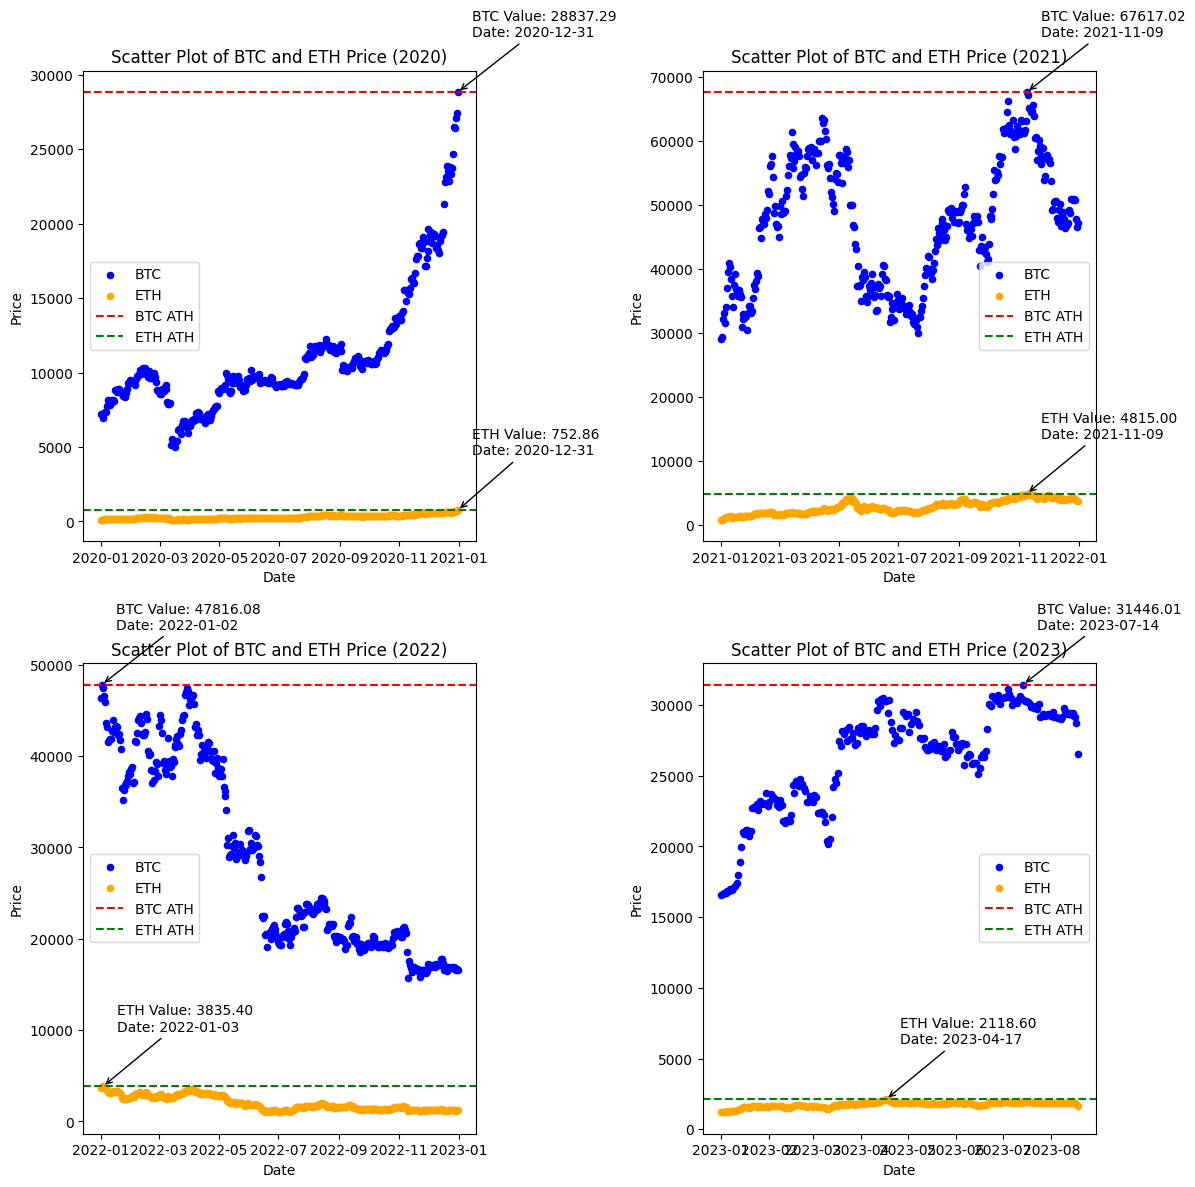

In [43]:


# Crear una lista de DataFrames y años correspondientes para BTC y ETH
dfs_btc = [df_btc_2020, df_btc_2021, df_btc_2022, df_btc_2023]  
dfs_eth = [df_eth_2020, df_eth_2021, df_eth_2022, df_eth_2023]  
years = [2020, 2021, 2022, 2023]

# Configurar el diseño de los subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Iterar a través de los DataFrames y años para generar los subgráficos
for i, (df_btc, df_eth) in enumerate(zip(dfs_btc, dfs_eth)):
    row = i // 2
    col = i % 2
    
    # Concatenar los DataFrames de BTC y ETH
    df_concat = pd.concat([df_btc, df_eth], axis=0)
    
    ax = axes[row, col]  # Obtener el eje actual
    
    # Dibujar los puntos para BTC y ETH en el mismo eje
    df_btc.plot(x='date', y='price', kind='scatter', ax=ax, color='blue', label='BTC')
    df_eth.plot(x='date', y='price', kind='scatter', ax=ax, color='orange', label='ETH')
    
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.set_title(f'Scatter Plot of BTC and ETH Price ({years[i]})')
    
    # Obtener el ATH de BTC y ETH del año actual
    ath_value_btc = df_btc['price'].max()
    ath_value_eth = df_eth['price'].max()
    
    # Obtener la fecha correspondiente al ATH de BTC
    ath_date_btc = df_btc.loc[df_btc['price'].idxmax()]['date']
    
    # Obtener la fecha correspondiente al ATH de ETH
    ath_date_eth = df_eth.loc[df_eth['price'].idxmax()]['date']
    
    # Agregar la línea indicadora del ATH para BTC y ETH
    ax.axhline(y=ath_value_btc, color='red', linestyle='--', label='BTC ATH')
    ax.axhline(y=ath_value_eth, color='green', linestyle='--', label='ETH ATH')
    
    # Formatear las fechas del ATH para mostrar solo el año, mes y día (sin hora)
    formatted_ath_date_btc = ath_date_btc.strftime('%Y-%m-%d')
    formatted_ath_date_eth = ath_date_eth.strftime('%Y-%m-%d')
    
    # Agregar anotaciones para mostrar el valor y la fecha del ATH en cada punto para BTC y ETH
    ax.annotate(f'BTC Value: {ath_value_btc:.2f}\nDate: {formatted_ath_date_btc}', xy=(ath_date_btc, ath_value_btc),
                xytext=(10, 40), textcoords='offset points', arrowprops=dict(arrowstyle='->'))
    
    ax.annotate(f'ETH Value: {ath_value_eth:.2f}\nDate: {formatted_ath_date_eth}', xy=(ath_date_eth, ath_value_eth),
                xytext=(10, 40), textcoords='offset points', arrowprops=dict(arrowstyle='->'))

    # Mostrar leyenda
    ax.legend()

# Ajustar el diseño de los subplots y mostrar el gráfico
plt.tight_layout()
plt.show()



# Basándonos en los gráficos generados que muestran los precios de Bitcoin (BTC) y Ethereum (ETH) a lo largo de los años 2020, 2021, 2022 y 2023, se pueden extraer algunas conclusiones interesantes:

* Ambas criptomonedas, BTC y ETH, muestran una tendencia general ascendente en sus precios a lo largo de los años analizados. Esto sugiere un crecimiento continuo en la demanda y el interés por estas monedas digitales.

* Se observa que tanto BTC como ETH experimentan periodos de alta volatilidad en sus precios, con movimientos significativos en ambas direcciones. Esto refleja la naturaleza volátil del mercado de criptomonedas y la sensibilidad a factores externos.

* En varios momentos a lo largo de los años, tanto BTC como ETH alcanzan valores máximos históricos (ATH). Estos puntos destacados se representan en los gráficos con líneas discontinuas rojas y verdes, respectivamente. Estos ATH pueden estar relacionados con eventos específicos, como anuncios importantes, adopción masiva o cambios en el mercado financiero global.

* Si bien BTC y ETH comparten algunas similitudes en sus tendencias, también hay momentos en los que los precios divergen. Por ejemplo, un ATH para BTC no necesariamente se corresponde con un ATH para ETH en el mismo período. Esto puede indicar que los factores que influyen en los precios pueden diferir entre ambas criptomonedas.

* Los gráficos resaltan la dinámica cambiante del mercado de criptomonedas. Los movimientos de precios bruscos pueden ser atribuidos a una variedad de factores, como noticias, regulaciones, adopción institucional y sentimiento del mercado. Estos factores pueden influir en la percepción de valor y en las decisiones de inversión.

* La inclusión de anotaciones en los gráficos resalta la importancia de los ATH para ambas criptomonedas. Estos puntos de referencia pueden servir como hitos clave en la historia de BTC y ETH, y representan niveles de precios que los inversores y entusiastas observan de cerca.

### Estos gráficos de dispersión y las anotaciones proporcionan una visión visual de la evolución de los precios de Bitcoin y Ethereum a lo largo de varios años. Si bien no es posible predecir el comportamiento futuro del mercado de criptomonedas, estos gráficos ayudan a identificar tendencias pasadas y patrones que pueden ser relevantes para los interesados en este espacio.

## Año 2020:

### BITCOIN:

* El ATH (All-Time High, o Máximo Histórico) de Bitcoin en 2020 se debió a una combinación de factores fundamentales y eventos en el mercado que llevaron a un aumento significativo en el precio de Bitcoin. Durante 2020, hubo un creciente interés y participación por parte de instituciones financieras, inversores y fondos de cobertura en el espacio de las criptomonedas, incluyendo Bitcoin. La entrada de inversores institucionales fue vista como un signo de legitimidad y atrajo más capital al mercado de Bitcoin. El tercer halving de Bitcoin ocurrió en mayo de 2020, lo que redujo la tasa de emisión de nuevas monedas y a menudo se asocia con aumentos en el precio.

* En respuesta a la pandemia de COVID-19, muchos gobiernos alrededor del mundo implementaron medidas de estímulo económico, como la impresión de dinero y la reducción de tasas de interés. Estas políticas monetarias expansivas llevaron a preocupaciones sobre la inflación y aumentaron el interés en activos alternativos como Bitcoin, considerado por algunos como una reserva de valor similar al oro.

* Durante 2020, hubo un aumento en el interés y la participación de inversores minoristas en el mercado de criptomonedas. Plataformas de inversión y aplicaciones móviles facilitaron la compra y el comercio de Bitcoin, lo que contribuyó a un aumento en la demanda.

* Por ultimo, y no menos importante durante el 2020 Bitcoin ganó reconocimiento como un "refugio seguro digital" en momentos de incertidumbre económica y financiera. La narrativa de que Bitcoin podría actuar como una reserva de valor en tiempos de volatilidad del mercado global atrajo a inversores preocupados por la situación económica.


### ETH:

*  Durante 2020, el ecosistema DeFi en Ethereum creció significativamente. Las aplicaciones y protocolos DeFi permiten a los usuarios prestar, pedir prestado y realizar otras operaciones financieras sin intermediarios. Este auge de DeFi atrajo mucha atención y participación en Ethereum, lo que podría haber impulsado la demanda de ETH.

* A finales de 2020, Ethereum comenzó su transición a Ethereum 2.0, que es una actualización importante destinada a mejorar la escalabilidad y la eficiencia de la red. Esto podría haber generado optimismo y confianza en el futuro de Ethereum, lo que a su vez podría haber influido en el aumento del precio.

* Ethereum 2.0: Una de las principales razones para la creación de Ethereum 2.0 fue abordar la escalabilidad de la red. La red Ethereum original (Ethereum 1.0) tenía limitaciones en cuanto a la cantidad de transacciones que podía manejar por segundo. Ethereum 2.0 busca resolver este problema mediante la implementación de un nuevo mecanismo de consenso llamado Prueba de Participación (Proof of Stake, PoS), que reemplaza al antiguo mecanismo de Prueba de Trabajo (Proof of Work, PoW). Ethereum 2.0 utiliza un algoritmo de consenso de Prueba de Participación, en el que los validadores (stakers) deben bloquear una cantidad de Ether como garantía y participar activamente en la validación de bloques en lugar de competir por resolver algoritmos computacionales complejos como en PoW. Esto permite una mayor eficiencia energética y una mayor velocidad de transacción. Ethereum 2.0 introduce la idea de fragmentación, que implica dividir la red en múltiples cadenas llamadas "shards" (fragmentos). Cada fragmento puede procesar su propio conjunto de transacciones y contratos inteligentes, lo que aumenta significativamente la capacidad de procesamiento de la red en general. Ethereum 2.0 busca mejorar la seguridad de la red al reducir la necesidad de que los validadores compitan por bloques, lo que reduce el riesgo de ataques maliciosos. Además, al eliminar el alto consumo de energía asociado con la minería de PoW, Ethereum 2.0 es más sostenible y amigable con el medio ambiente.
Transición Gradual: La transición de Ethereum 1.0 a Ethereum 2.0 se realiza en varias fases para garantizar una migración suave y segura. Esto incluye el lanzamiento de la Beacon Chain, que es una cadena paralela que opera en PoS, y la futura integración de fragmentos y otras mejoras. Con la implementación de Ethereum 2.0, se espera que las tarifas de transacción sean más predecibles y estables en comparación con las fluctuaciones extremas observadas en Ethereum 1.0 durante períodos de congestión de la red.

* Durante 2020, hubo un aumento en el interés institucional en las criptomonedas en general. Las empresas y fondos de inversión comenzaron a considerar la inclusión de criptomonedas en sus carteras de inversión, lo que podría haber tenido un impacto positivo en el precio de Ethereum y otras criptomonedas.

* La oferta de Ethereum también puede haber influido en su precio. Si la demanda aumenta y la oferta disponible en el mercado es limitada, esto puede contribuir a un aumento en el precio.

/var/folders/9h/wktndydj5rg6pj7yfx6ws1gm0000gn/T/ipykernel_88635/6290448.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_btc['token'] = 'BTC'
/var/folders/9h/wktndydj5rg6pj7yfx6ws1gm0000gn/T/ipykernel_88635/6290448.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eth['token'] = 'ETH'
/var/folders/9h/wktndydj5rg6pj7yfx6ws1gm0000gn/T/ipykernel_88635/6290448.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

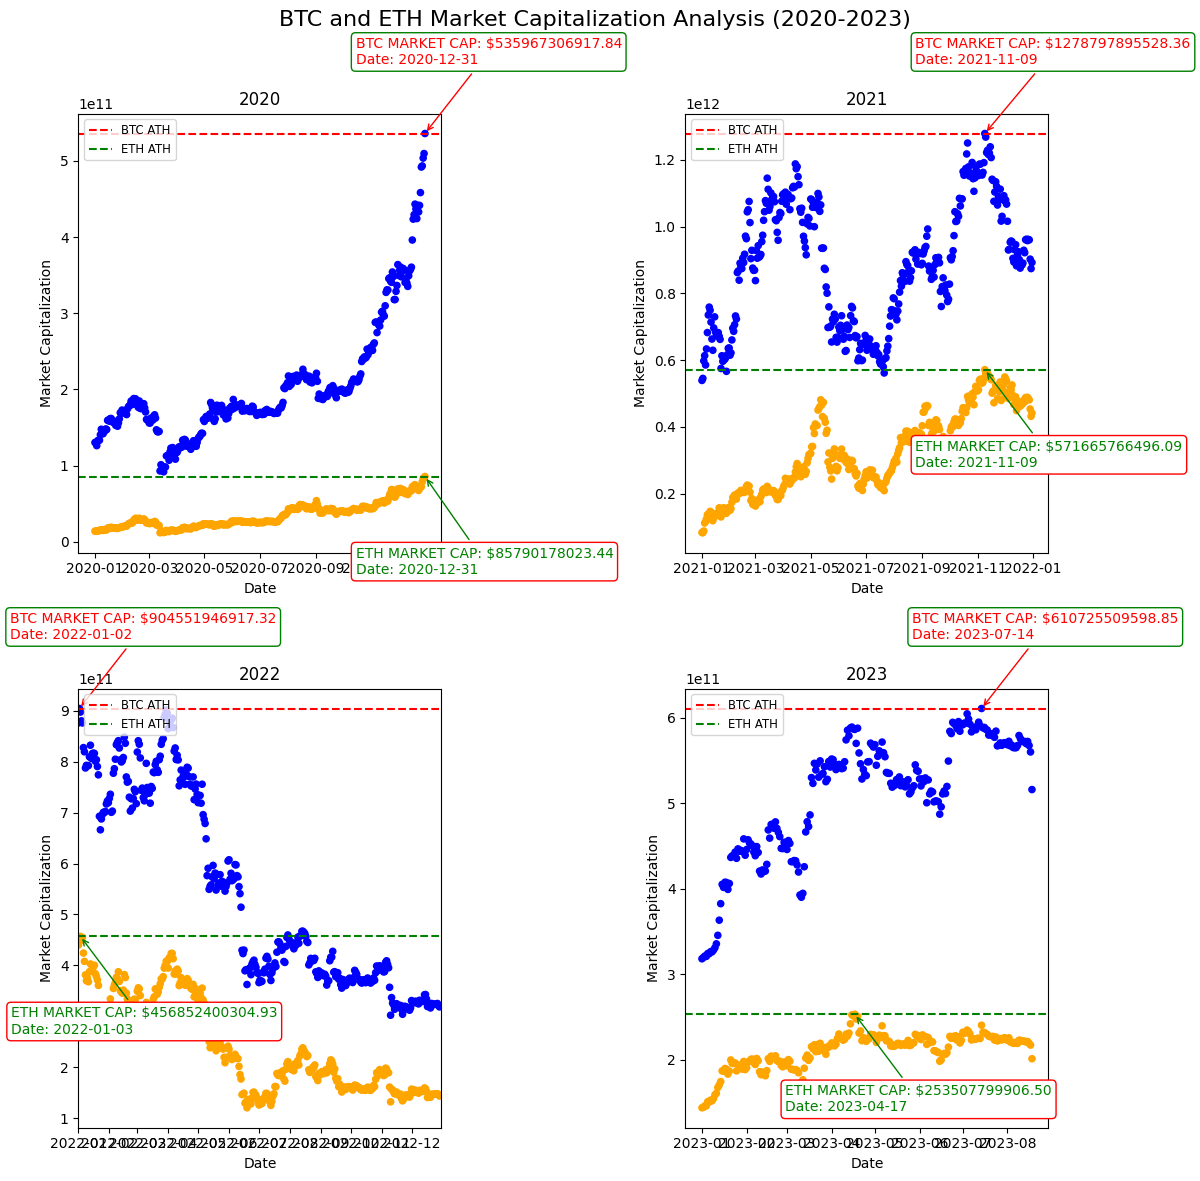

In [44]:

dfs_btc = [df_btc_2020, df_btc_2021, df_btc_2022, df_btc_2023]  
dfs_eth = [df_eth_2020, df_eth_2021, df_eth_2022, df_eth_2023] 
years = [2020, 2021, 2022, 2023]

# Configurar el diseño de los subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Título general del gráfico
fig.suptitle("BTC and ETH Market Capitalization Analysis (2020-2023)", fontsize=16)

for i, (df_btc, df_eth) in enumerate(zip(dfs_btc, dfs_eth)):
    row = i // 2
    col = i % 2
    
    df_btc['token'] = 'BTC'
    df_eth['token'] = 'ETH'
    
    df_concat = pd.concat([df_btc, df_eth], axis=0)
    
    ax = df_concat.plot(x='date', y='market_cap', kind='scatter', ax=axes[row, col],
                        c=df_concat['token'].map({'BTC': 'blue', 'ETH': 'orange'}))  # Asignar colores según el token
    
    ax.set_xlabel('Date')
    ax.set_ylabel('Market Capitalization')
    ax.set_title(f'{years[i]}')
    
    if years[i] == 2022:
        ax.set_xlim(pd.Timestamp('2022-01-01'), pd.Timestamp('2022-12-31'))  # Ajustar rango del eje x
    
    market_cap_value_btc = df_btc['market_cap'].max()
    market_cap_value_eth = df_eth['market_cap'].max()
    
    market_cap_date_btc = df_btc.loc[df_btc['market_cap'].idxmax()]['date']
    market_cap_date_eth = df_eth.loc[df_eth['market_cap'].idxmax()]['date']
    
    ax.axhline(y=market_cap_value_btc, color='red', linestyle='--', label='BTC ATH')
    ax.axhline(y=market_cap_value_eth, color='green', linestyle='--', label='ETH ATH')
    
    formatted_market_cap_date_btc = market_cap_date_btc.strftime('%Y-%m-%d')
    formatted_market_cap_date_eth = market_cap_date_eth.strftime('%Y-%m-%d')
    
    bbox_props = dict(boxstyle='round', facecolor='white', edgecolor='red' if df_btc['market_cap'].idxmax() == 0 else 'green')
    
    ax.annotate(f'BTC MARKET CAP: ${market_cap_value_btc:.2f}\nDate: {formatted_market_cap_date_btc}',
                xy=(market_cap_date_btc, market_cap_value_btc), xytext=(-50, 50), textcoords='offset points',
                arrowprops=dict(arrowstyle='->', color='red'), color='red', bbox=bbox_props)
    
    bbox_props = dict(boxstyle='round', facecolor='white', edgecolor='green' if df_eth['market_cap'].idxmax() == 0 else 'red')
    
    ax.annotate(f'ETH MARKET CAP: ${market_cap_value_eth:.2f}\nDate: {formatted_market_cap_date_eth}',
                xy=(market_cap_date_eth, market_cap_value_eth), xytext=(-50, -70), textcoords='offset points',
                arrowprops=dict(arrowstyle='->', color='green'), color='green', bbox=bbox_props)

    ax.legend(loc='upper left', fontsize='small')  # Ajustar la ubicación y el tamaño de la leyenda

plt.tight_layout()
plt.show()




### Los gráficos que hemos generado al comparar los valores de capitalización de mercado (market cap) de Bitcoin (BTC) y Ethereum (ETH) a lo largo de los años ofrecen las siguientes conclusiones:

* Podemos observar cómo la capitalización de mercado de BTC y ETH ha evolucionado a lo largo de los años. Ambas criptomonedas muestran un crecimiento significativo en sus valores de market cap, lo que indica una mayor adopción y valorización en el mercado de criptomonedas.

* La comparación de los gráficos de market cap de BTC y ETH nos permite entender cómo la dominancia en el mercado de criptomonedas ha variado con el tiempo. Si vemos un período en el que la capitalización de mercado de ETH se acerca o incluso supera a la de BTC, esto podría indicar un mayor interés y confianza en Ethereum en ese período específico.

* Cualquier pico o caída drástica en la capitalización de mercado de BTC o ETH podría estar relacionado con eventos significativos en el ecosistema de criptomonedas, ejemplo COVID-19 entre los años 2020-2021 y 2022, como tambien la guerra Rusia- Ucrania, algunos lanzamientos de actualizaciones importantes como la modificacion de la mineria en eth, cambios regulatorios de la SEC, o fluctuaciones en los mercados financieros tradicionales.

* Observar las variaciones en los gráficos de market cap de BTC y ETH puede ayudarnos a comprender cómo estas dos criptomonedas pueden reaccionar de manera diferente a condiciones del mercado similares. Una mayor volatilidad en uno de los activos puede indicar un mayor grado de especulación o inversión activa en comparación con el otro.

* A lo largo de los años, es posible identificar momentos en los que tanto BTC como ETH experimentan un aumento o disminución en su capitalización de mercado en la misma fecha, lo que sugiere que pueden estar correlacionados en ciertas situaciones.

### En general, estos gráficos nos permiten visualizar y comparar el crecimiento y la evolución de Bitcoin y Ethereum en términos de capitalización de mercado

## VAMOS A SEGUIR ANALIZANDO DATOS DE VALORES CON EL RESTO DE LAS TOKENS SELECCIONADAS:


# CARDANO

In [68]:
df_ada = pd.read_csv("/Users/benjaminzelaya/Desktop/PI_DA-main/PI_2_Henry/DATA ETL/combined_df_cardano.csv")
df_ada

,date,price,market_cap,ath_value,ath_date,symbol,name
0,2020-01-01,0.032912,1.020671e+09,2.967075,2021-09-04,ada,Cardano
1,2020-01-02,0.033362,1.038898e+09,2.967075,2021-09-04,ada,Cardano
2,2020-01-03,0.032618,1.015101e+09,2.967075,2021-09-04,ada,Cardano
3,2020-01-04,0.033967,1.060794e+09,2.967075,2021-09-04,ada,Cardano
4,2020-01-05,0.034298,1.067106e+09,2.967075,2021-09-04,ada,Cardano
...,...,...,...,...,...,...,...
1321,2023-08-14,0.289372,1.013505e+10,2.967075,2021-09-04,ada,Cardano
1322,2023-08-15,0.290452,1.018196e+10,2.967075,2021-09-04,ada,Cardano
1323,2023-08-16,0.281729,9.874705e+09,2.967075,2021-09-04,ada,Cardano
1324,2023-08-17,0.274852,9.638401e+09,2.967075,2021-09-04,ada,Cardano


#  observaciones de todos los meses del año 2020

In [69]:
df_ada['date'] = pd.to_datetime(df_ada['date'])

# datos del año 2020
df_ada_2020 = df_ada[df_ada['date'].dt.year == 2020]
df_ada_2020

,date,price,market_cap,ath_value,ath_date,symbol,name
0,2020-01-01,0.032912,1.020671e+09,2.967075,2021-09-04,ada,Cardano
1,2020-01-02,0.033362,1.038898e+09,2.967075,2021-09-04,ada,Cardano
2,2020-01-03,0.032618,1.015101e+09,2.967075,2021-09-04,ada,Cardano
3,2020-01-04,0.033967,1.060794e+09,2.967075,2021-09-04,ada,Cardano
4,2020-01-05,0.034298,1.067106e+09,2.967075,2021-09-04,ada,Cardano
...,...,...,...,...,...,...,...
361,2020-12-27,0.158331,4.921660e+09,2.967075,2021-09-04,ada,Cardano
362,2020-12-28,0.154970,4.874264e+09,2.967075,2021-09-04,ada,Cardano
363,2020-12-29,0.177697,5.510917e+09,2.967075,2021-09-04,ada,Cardano
364,2020-12-30,0.192876,5.977651e+09,2.967075,2021-09-04,ada,Cardano


In [70]:
df_ada_2020

,date,price,market_cap,ath_value,ath_date,symbol,name
0,2020-01-01,0.032912,1.020671e+09,2.967075,2021-09-04,ada,Cardano
1,2020-01-02,0.033362,1.038898e+09,2.967075,2021-09-04,ada,Cardano
2,2020-01-03,0.032618,1.015101e+09,2.967075,2021-09-04,ada,Cardano
3,2020-01-04,0.033967,1.060794e+09,2.967075,2021-09-04,ada,Cardano
4,2020-01-05,0.034298,1.067106e+09,2.967075,2021-09-04,ada,Cardano
...,...,...,...,...,...,...,...
361,2020-12-27,0.158331,4.921660e+09,2.967075,2021-09-04,ada,Cardano
362,2020-12-28,0.154970,4.874264e+09,2.967075,2021-09-04,ada,Cardano
363,2020-12-29,0.177697,5.510917e+09,2.967075,2021-09-04,ada,Cardano
364,2020-12-30,0.192876,5.977651e+09,2.967075,2021-09-04,ada,Cardano


In [71]:
# Guardar el DataFrame combinado en un archivo CSV
df_ada_2020.to_csv('df_ada_2020.csv', index=False)

#  observaciones de todos los meses del año 2021

In [72]:
df_ada['date'] = pd.to_datetime(df_ada['date'])

# datos del año 2021
df_ada_2021 = df_ada[df_ada['date'].dt.year == 2021]
df_ada_2021

,date,price,market_cap,ath_value,ath_date,symbol,name
366,2021-01-01,0.182071,5.664963e+09,2.967075,2021-09-04,ada,Cardano
367,2021-01-02,0.175679,5.459442e+09,2.967075,2021-09-04,ada,Cardano
368,2021-01-03,0.178185,5.541072e+09,2.967075,2021-09-04,ada,Cardano
369,2021-01-04,0.205037,6.478554e+09,2.967075,2021-09-04,ada,Cardano
370,2021-01-05,0.218888,6.776976e+09,2.967075,2021-09-04,ada,Cardano
...,...,...,...,...,...,...,...
726,2021-12-27,1.457777,4.672342e+10,2.967075,2021-09-04,ada,Cardano
727,2021-12-28,1.521304,4.903067e+10,2.967075,2021-09-04,ada,Cardano
728,2021-12-29,1.411581,4.551012e+10,2.967075,2021-09-04,ada,Cardano
729,2021-12-30,1.337741,4.266932e+10,2.967075,2021-09-04,ada,Cardano


In [73]:
# Guardar el DataFrame combinado en un archivo CSV
df_ada_2021.to_csv('df_ada_2021.csv', index=False)

#  observaciones de todos los meses del año 2022

In [74]:
df_ada['date'] = pd.to_datetime(df_ada['date'])

# datos del año 2022
df_ada_2022 = df_ada[df_ada['date'].dt.year == 2022]
df_ada_2022

,date,price,market_cap,ath_value,ath_date,symbol,name
731,2022-01-01,1.310720,4.219625e+10,2.967075,2021-09-04,ada,Cardano
732,2022-01-02,1.378405,4.420048e+10,2.967075,2021-09-04,ada,Cardano
733,2022-01-03,1.379503,4.429207e+10,2.967075,2021-09-04,ada,Cardano
734,2022-01-04,1.323948,4.257930e+10,2.967075,2021-09-04,ada,Cardano
735,2022-01-05,1.311843,4.236177e+10,2.967075,2021-09-04,ada,Cardano
...,...,...,...,...,...,...,...
1091,2022-12-27,0.265371,9.291688e+09,2.967075,2021-09-04,ada,Cardano
1092,2022-12-28,0.260492,9.120634e+09,2.967075,2021-09-04,ada,Cardano
1093,2022-12-29,0.248406,8.706853e+09,2.967075,2021-09-04,ada,Cardano
1094,2022-12-30,0.244315,8.562206e+09,2.967075,2021-09-04,ada,Cardano


In [75]:
# Guardar el DataFrame combinado en un archivo CSV
df_ada_2022.to_csv('df_ada_2022.csv', index=False)

#  observaciones de todos los meses del año 2023

In [76]:
df_ada['date'] = pd.to_datetime(df_ada['date'])

# datos del año 2023
df_ada_2023 = df_ada[df_ada['date'].dt.year == 2023]
df_ada_2023

,date,price,market_cap,ath_value,ath_date,symbol,name
1096,2023-01-01,0.246398,8.639667e+09,2.967075,2021-09-04,ada,Cardano
1097,2023-01-02,0.249938,8.760815e+09,2.967075,2021-09-04,ada,Cardano
1098,2023-01-03,0.253948,8.909442e+09,2.967075,2021-09-04,ada,Cardano
1099,2023-01-04,0.253144,8.866077e+09,2.967075,2021-09-04,ada,Cardano
1100,2023-01-05,0.267948,9.386328e+09,2.967075,2021-09-04,ada,Cardano
...,...,...,...,...,...,...,...
1321,2023-08-14,0.289372,1.013505e+10,2.967075,2021-09-04,ada,Cardano
1322,2023-08-15,0.290452,1.018196e+10,2.967075,2021-09-04,ada,Cardano
1323,2023-08-16,0.281729,9.874705e+09,2.967075,2021-09-04,ada,Cardano
1324,2023-08-17,0.274852,9.638401e+09,2.967075,2021-09-04,ada,Cardano


In [77]:
# Guardar el DataFrame combinado en un archivo CSV
df_ada_2023.to_csv('df_ada_2023.csv', index=False)

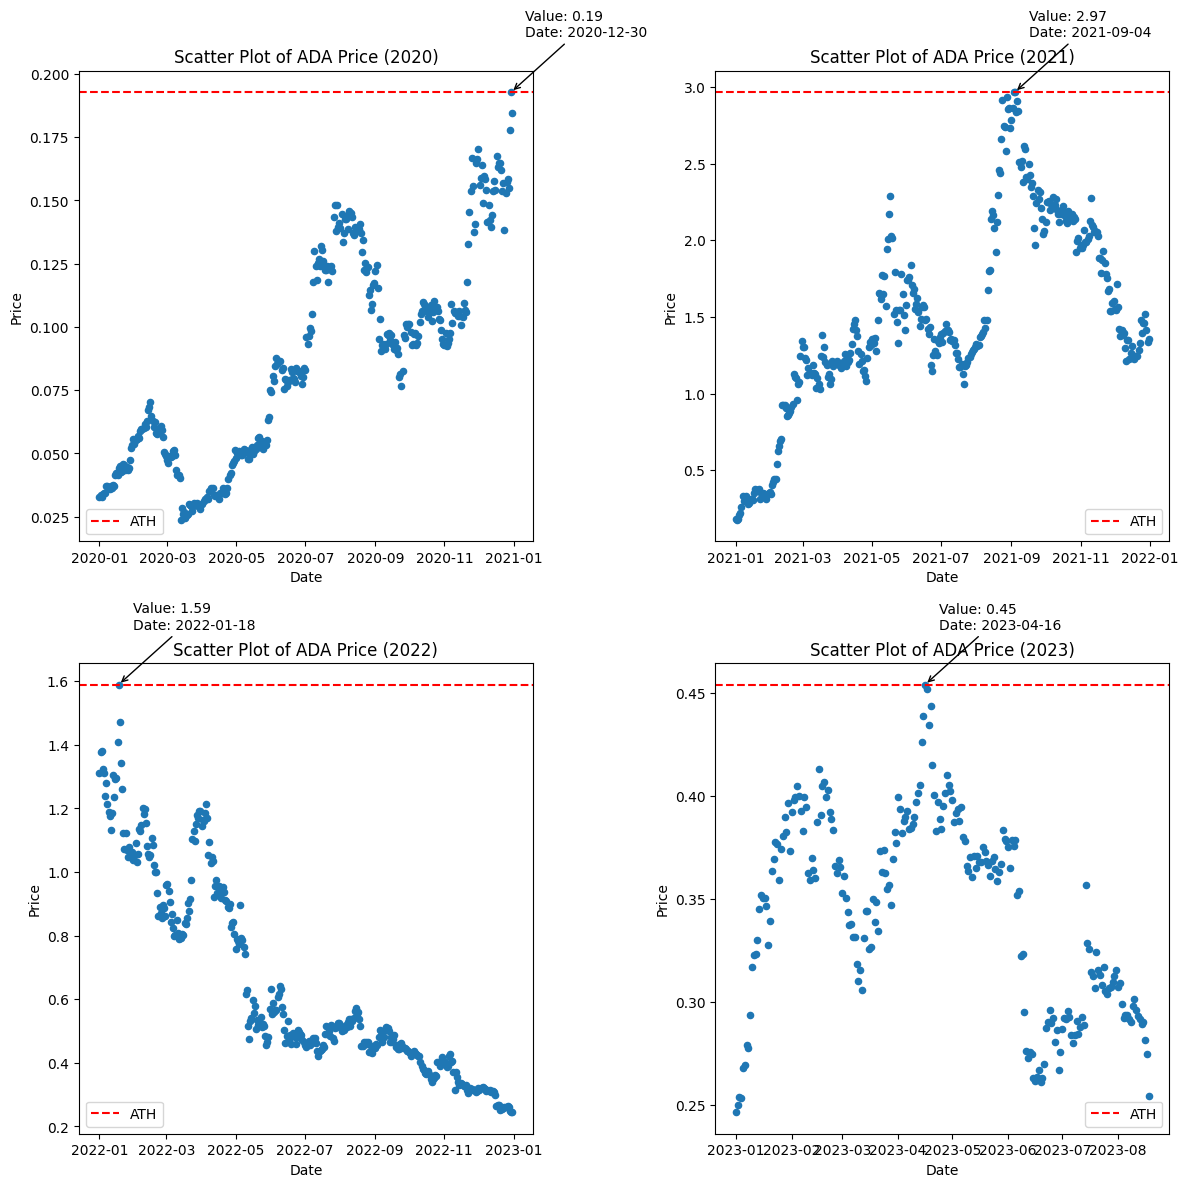

In [81]:

# Crear una lista de DataFrames y años correspondientes
dfs_ada = [df_ada_2020,df_ada_2021,df_ada_2022,df_ada_2023]
years = [2020, 2021, 2022, 2023]

# Configurar el diseño de los subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Iterar a través de los DataFrames y años para generar los subgráficos
for i, df_ada in enumerate(dfs_ada):
    row = i // 2
    col = i % 2
    
    ax = df_ada.plot(x='date', y='price', kind='scatter', ax=axes[row, col])
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.set_title(f'Scatter Plot of ADA Price ({years[i]})')
    
    # Obtener el ATH del año actual
    ath_value = df_ada['price'].max()
    
    # Obtener la fecha correspondiente al ATH
    ath_date = df_ada.loc[df_ada['price'].idxmax()]['date']
    
    # Agregar la línea indicadora del ATH
    ax.axhline(y=ath_value, color='red', linestyle='--', label='ATH')
    
    # Formatear la fecha del ATH para mostrar solo el año, mes y día (sin hora)
    formatted_ath_date = ath_date.strftime('%Y-%m-%d')
    
    # Agregar anotación para mostrar el valor y la fecha del ATH en cada punto
    ax.annotate(f'Value: {ath_value:.2f}\nDate: {formatted_ath_date}', xy=(ath_date, ath_value),
                xytext=(10, 40), textcoords='offset points', arrowprops=dict(arrowstyle='->'))

    # Mostrar leyenda
    ax.legend()

# Ajustar el diseño de los subplots y mostrar el gráfico
plt.tight_layout()
plt.show()

###  puntos correspondientes a los valores máximos (ATH) de cada año del token ADA(cardano):

* Las conclusiones que podríamos sacar de estos gráficos:

* Observamos la distribución de los puntos en los gráficos te permitiendonos identificar tendencias en los precios de ADA a lo largo de diferentes años, como ser 2020, 2021,2022 y 2023, los valores máximos (ATH) de precios de ADA cambian de un año a otro, sobre todo considerando los diferentes momentos del ATH de cada uno de los años que estamos analizando, permitiendo visilizar la volatilidad de los precios y los años en los que los precios alcanzan niveles excepcionales en comparación con otros años.

* Las anotaciones en cada gráfico muestran la fecha y el valor del ATH para cada año e identificamos justamente los momentos específicos en los que el precio de ADA alcanzó su máximo histórico en cada año, que tambien nos permite comparar fácilmente los movimientos de precios de ADA entre los diferentes años, debemos siempre tener en cuenta del rally bullmarket de los años 2020 y 2021 sobre el 2022 y 2023 que estariamos transitando el bearmarket.

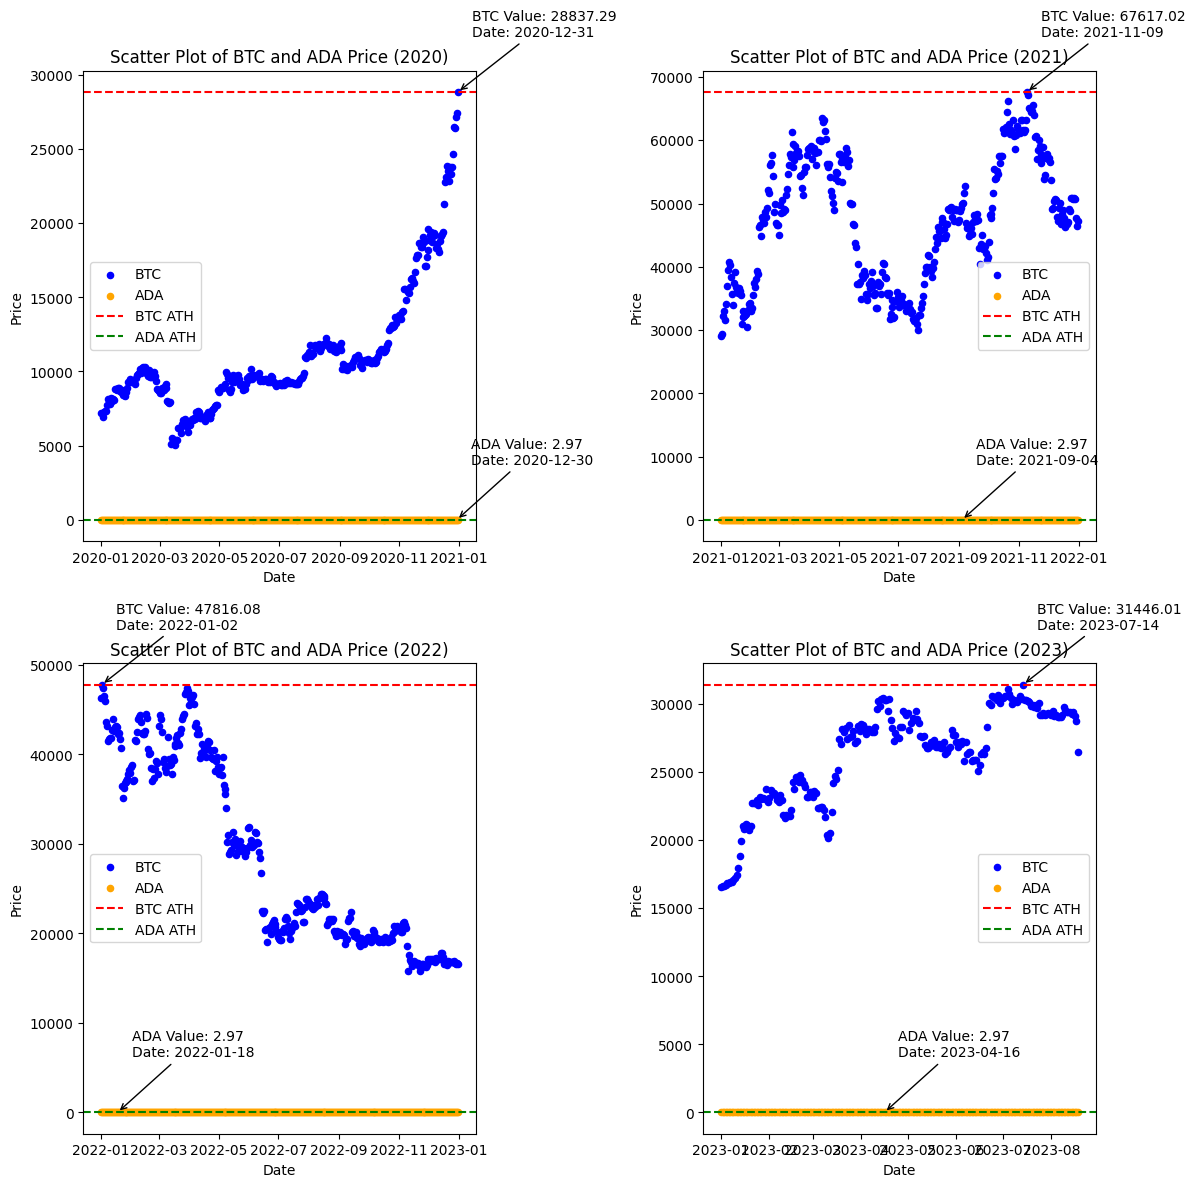

In [85]:


# Crear una lista de DataFrames y años correspondientes para BTC y ADA
dfs_btc = [df_btc_2020, df_btc_2021, df_btc_2022, df_btc_2023]  
dfs_ada = [df_ada_2020,df_ada_2021,df_ada_2022,df_ada_2023]
years = [2020, 2021, 2022, 2023]

# Configurar el diseño de los subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Iterar a través de los DataFrames y años para generar los subgráficos
for i, (df_btc, dfs_ada) in enumerate(zip(dfs_btc, dfs_ada)):
    row = i // 2
    col = i % 2
    
    # Concatenar los DataFrames de BTC y ADA
    df_concat = pd.concat([df_btc, dfs_ada], axis=0)
    
    ax = axes[row, col]  # Obtener el eje actual
    
    # Dibujar los puntos para BTC y ADA en el mismo eje
    df_btc.plot(x='date', y='price', kind='scatter', ax=ax, color='blue', label='BTC')
    dfs_ada.plot(x='date', y='price', kind='scatter', ax=ax, color='orange', label='ADA')
    
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.set_title(f'Scatter Plot of BTC and ADA Price ({years[i]})')
    
    # Obtener el ATH de BTC y ADA del año actual
    ath_value_btc = df_btc['price'].max()
    ath_value_eth = dfs_ada['price'].max()
    
    # Obtener la fecha correspondiente al ATH de BTC
    ath_date_btc = df_btc.loc[df_btc['price'].idxmax()]['date']
    
    # Obtener la fecha correspondiente al ATH de ETH
    ath_date_ada = dfs_ada.loc[dfs_ada['price'].idxmax()]['date']
    
    # Agregar la línea indicadora del ATH para BTC y ADA
    ax.axhline(y=ath_value_btc, color='red', linestyle='--', label='BTC ATH')
    ax.axhline(y=ath_value_ada, color='green', linestyle='--', label='ADA ATH')
    
    # Formatear las fechas del ATH para mostrar solo el año, mes y día (sin hora)
    formatted_ath_date_btc = ath_date_btc.strftime('%Y-%m-%d')
    formatted_ath_date_ada = ath_date_ada.strftime('%Y-%m-%d')
    
    # Agregar anotaciones para mostrar el valor y la fecha del ATH en cada punto para BTC y ADA
    ax.annotate(f'BTC Value: {ath_value_btc:.2f}\nDate: {formatted_ath_date_btc}', xy=(ath_date_btc, ath_value_btc),
                xytext=(10, 40), textcoords='offset points', arrowprops=dict(arrowstyle='->'))
    
    ax.annotate(f'ADA Value: {ath_value_ada:.2f}\nDate: {formatted_ath_date_ada}', xy=(ath_date_ada, ath_value_ada),
                xytext=(10, 40), textcoords='offset points', arrowprops=dict(arrowstyle='->'))

    # Mostrar leyenda
    ax.legend()

# Ajustar el diseño de los subplots y mostrar el gráfico
plt.tight_layout()
plt.show()


### Al visualizar los gráficos de BTC y ADA en el mismo eje, puedes comparar directamente cómo los precios de BTC y ADA se han movido a lo largo del tiempo. La elección de colores (azul para BTC y naranja para ADA) hace que sea fácil distinguir entre los dos activos:

* La línea punteada roja representa el ATH de BTC, mientras que la línea punteada azul representa el ATH de ADA en cada año, al comparar estas líneas con la distribución de puntos, podemos observar en qué momentos los precios alcanzaron sus máximos históricos y cómo se comparan entre los dos activos, donde claramente vemos que salvo el año 2020, donde se ve marcadamente una correlacion entre sus ATH, el resto de los años analizados se fieron en diferentes momentos del año.

* Al observar la distribución general de los puntos en cada gráfico, identificamos justamente las tendencias y patrones en los movimientos de precios a lo largo de los años. Esto puede proporcionar información sobre cómo BTC y ADA han respondido a diferentes condiciones del mercado en diferentes momentos.

* Los puntos están más dispersos, nos indican una mayor volatilidad de precios en ese año, mientras que los que están más cerca, sugieren una mayor estabilidad de precios. 